<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
---



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. Sigmoid funtion
----

</br>

## <center>$H(x) = \frac{1}{1+e^{(-x)}} = \sigma(x)$</center>

**<center> e(e=2.718281..):**  자연 상수

* 구현

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

* 시각화

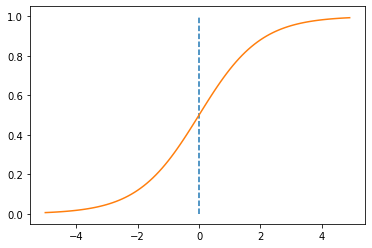

In [33]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot([0,0],[0,1], linestyle='--')
plt.plot(x, y)

## 2. 개념정리
---

</br>

### <center>$y = \sigma (Wx+b)$</center>

* Regression 구현

In [34]:
def regression(x, w=1, b=0):
  return np.dot(w,x)+b

* Logistic regression 구현

In [35]:
def hypothesis(x, w=1, b=0):
  y = regression(x,w,b)
  y = sigmoid(y)
  return y

* 데이터 정의

|라운드점수|종합점수|결과
|------|---|---|
|-3|1|패배|
|-2|1|패배|
|-1|2|패배|
|0|3|패배|
|1|5|승리|
|2|8|승리|
|3|9|승리|


In [47]:
x = [-3,-2,-1,0,1,2,3]
y = [0,0,0,0,1,1,1]

* 시각화

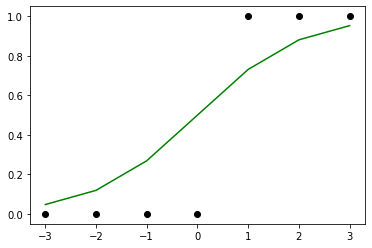

In [76]:
y_pred = hypothesis(x)
plt.plot(x, y , marker='o', linestyle='', color='k')
plt.plot(x, y_pred, color='g')
plt.show()

* W 값에 따른 함수의 변화

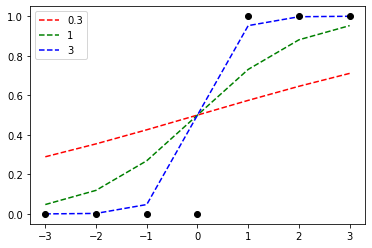

In [77]:
W_list = [0.3, 1, 3]
color_list = ['r','g','b']

for W , color in zip(W_list, color_list):
  y_pred = hypothesis(x, w=W)
  plt.plot(x, y_pred, 'r', linestyle='--', color=color)
plt.legend(W_list)

plt.plot(x, y , marker='o', linestyle='', color='k')
plt.show()

* b값에 따른 함수의 변화

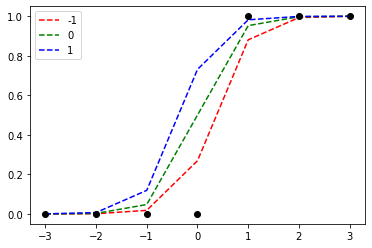

In [81]:
W=3
b_list = [-1, 0, 1]
color_list = ['r','g','b']

for b , color in zip(b_list, color_list):
  y_pred = hypothesis(x, w=W, b=b)
  plt.plot(x, y_pred, 'r', linestyle='--', color=color)
plt.legend(b_list)

plt.plot(x, y , marker='o', linestyle='', color='k')
plt.show()

## 3. Cross Entropy
---

</br>

## <center>$J(W) = -\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$</center>

</br>

<center> $y = 1 \rightarrow cost(y, \hat{y}) = -log(\hat{y})$</center>
<center> $y = 0 \rightarrow cost(y, \hat{y}) = -log(1-\hat{y})$</center>


* 구현

In [116]:
def J(y_pred, y=1):
  if y==1: return -(np.log10(y_pred))
  elif y==0: return -(np.log10(1-y_pred))
  else: return 0

* 시각화

Text(0, 0.5, 'Error')

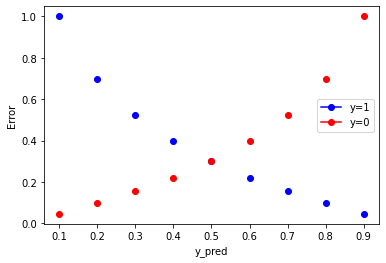

In [121]:
y_pred_range = np.arange(0.1,1,0.1)
for y_pred in y_pred_range:
  j = J(y_pred, y=1)
  plt.plot(y_pred, j, marker='o', color='b')
  
  j = J(y_pred, y=0)
  plt.plot(y_pred, j, marker='o', color='r')

plt.legend(["y=1", "y=0"])
plt.xlabel("y_pred")
plt.ylabel("Error")


## 4. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|11|불합격|
|2|2|8|23|불합격|
|3|4|8|30|불합격|
|4|3|7|44|불합격|
|5|5|7.5|55|합격|
|6|6|7|61|합격|
|7|6|6|73|합격|
|8|7|7|84|합격|
|9|6|6.5|98|합격|

* 데이터 정의

In [104]:
x = [[0,1,9],
      [1,1,8.5],
      [2,2,8],
      [3,4,8],
      [4,3,7],
      [5,5,7.5],
      [6,6,7],
      [7,6,6],
      [8,7,7],
      [9,6,6.5 ]
     ]
y = [0,0,0,0,0,1,1,1,1,1]

* 시각화 

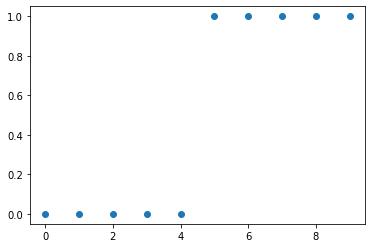

In [105]:
plt.plot(y, marker='o', linestyle='')
plt.show()

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [106]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [107]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[-0.04347062],
       [ 0.6001811 ],
       [-0.9818939 ]], dtype=float32), array([0.], dtype=float32)]
W: [[-0.04347062]
 [ 0.6001811 ]
 [-0.9818939 ]] b: [0.]


* 시각화

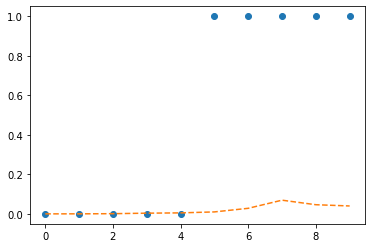

In [108]:
plt.plot(y, marker='o', linestyle='')
plt.plot(model.predict(x), linestyle='--')
plt.show()

### **모델 학습**

* 모델 컴파일

In [109]:
model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'binary_crossentropy',
              metrics=['acc']
              )

* 학습 진행

In [ ]:
model.fit(x, y, epochs=100)

### **결과**

* 학습 파라미터 확인

In [114]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[ 0.3356829 ],
       [ 0.9327783 ],
       [-0.74301696]], dtype=float32), array([0.03728792], dtype=float32)]
W: [[ 0.3356829 ]
 [ 0.9327783 ]
 [-0.74301696]] b: [0.03728792]


* 시각화

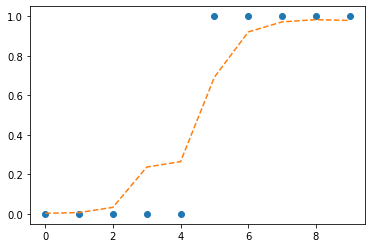

In [115]:
plt.plot(y, marker='o', linestyle='')
plt.plot(model.predict(x), linestyle='--')
plt.show()